# Hello, _nbpresent_!

In [1]:
import nbpresent
nbpresent.__version__

'3.0.2'

# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
%matplotlib inline

# import some more useful packages
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats 
import seaborn as sns

from scipy.stats import norm

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1.  Is the distribution of body temperatures normal?

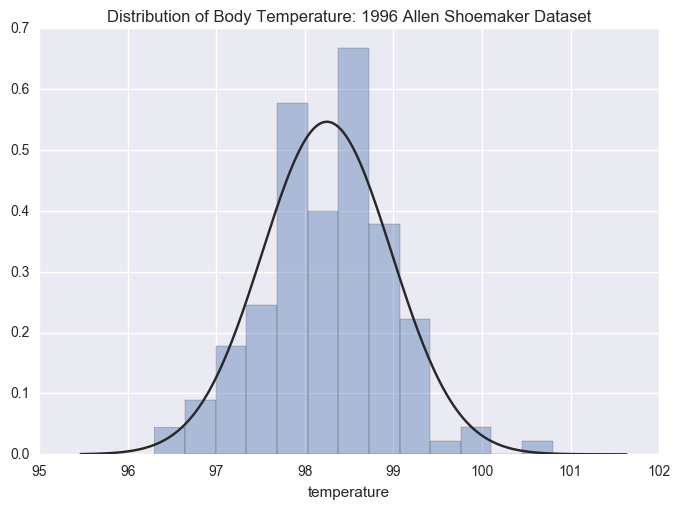

In [5]:
# create a df with just the temperature samples and call it tdf
tdf = df.temperature
# get a distribution plot of the data
sns.distplot(tdf, fit=norm,kde=False)
plt.title('Distribution of Body Temperature: 1996 Allen Shoemaker Dataset')

The distribution appears to be somewhat normal.  Let's do a D-Agostino and Pearson's test to determine whether or not the sample comes from a normal distribution.  Let's assume the null hypothesis that the sample does come from a normal distribution. If the probability of getting these results is low (below 5%), we will reject the null hypothesis and conclude the distribution is not normal.

In [6]:
# test for normality
scipy.stats.normaltest(tdf)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Since the probability is approximately 26%, we do not reject the null hypothesis and conclude that the data does represent a normal distribution.

Another way to test for normality is to do a probabiity plot that calculates a best fit line for the data.

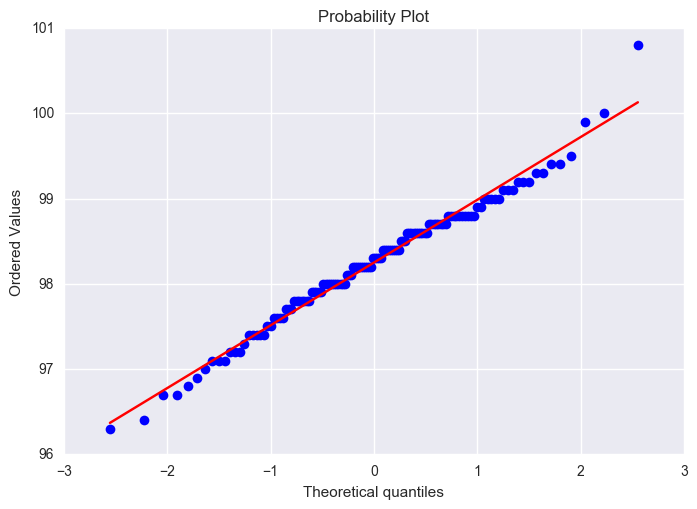

In [7]:
# create the probability plot
scipy.stats.probplot(tdf, dist="norm", plot=plt)
plt.show()

**The normal probability plot approximates a straight line indicating normality.**  There is one data point that appears to not fit and we may want to investigate whether this data point is an anomaly or reporting error that may need to be removed from the data set.  This is the 100.8 degrees Fahrenheit observation.  It could be that the person was actually sick and thus this data point should not be included in the data set of samples from healthy individuals. Let's create a new database without that data point and compare the results.

In [8]:
tdf_remove_outlier = tdf[tdf != 100.8]

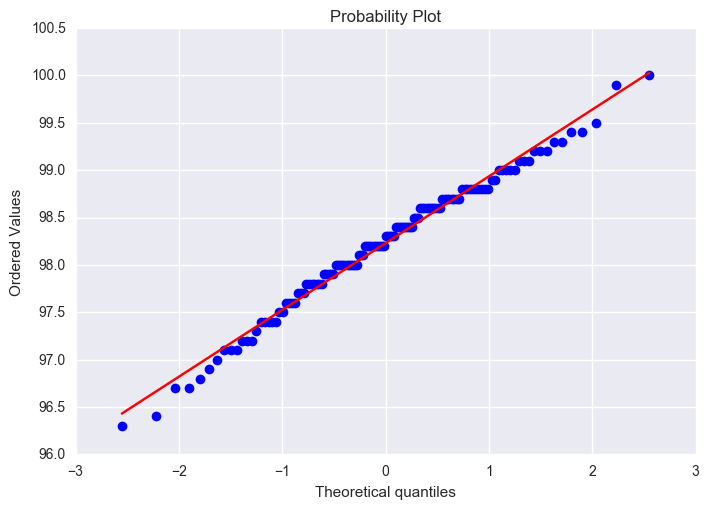

In [9]:
scipy.stats.probplot(tdf_remove_outlier, dist="norm", plot=plt)
plt.show()

In [10]:
scipy.stats.probplot(tdf, dist="norm")

((array([-2.55445479, -2.22902648, -2.0419783 , -1.90719589, -1.80015121,
         -1.71047373, -1.63275826, -1.56381343, -1.50159038, -1.44469181,
         -1.39212017, -1.3431372 , -1.29718048, -1.2538112 , -1.21268003,
         -1.17350409, -1.13605091, -1.10012698, -1.06556939, -1.03223961,
         -1.00001877, -0.96880405, -0.93850586, -0.90904562, -0.88035396,
         -0.85236935, -0.82503685, -0.79830725, -0.77213622, -0.74648367,
         -0.72131321, -0.69659166, -0.67228871, -0.64837651, -0.62482945,
         -0.60162387, -0.57873784, -0.55615102, -0.53384444, -0.51180041,
         -0.49000234, -0.46843466, -0.44708273, -0.42593273, -0.40497157,
         -0.38418687, -0.36356684, -0.34310027, -0.32277642, -0.30258504,
         -0.28251629, -0.2625607 , -0.24270913, -0.22295275, -0.20328303,
         -0.18369165, -0.16417053, -0.14471177, -0.12530767, -0.10595063,
         -0.08663321, -0.06734807, -0.04808795, -0.02884566, -0.00961403,
          0.00961403,  0.02884566,  0.

In [11]:
scipy.stats.probplot(tdf_remove_outlier, dist="norm")

((array([-2.55177249, -2.22603746, -2.03878185, -1.903833  , -1.79664454,
         -1.70683782, -1.62900324, -1.55994675, -1.49761773, -1.44061765,
         -1.38794806, -1.33887001, -1.29282056, -1.24936047, -1.20814007,
         -1.16887618, -1.1313361 , -1.09532612, -1.06068315, -1.0272685 ,
         -0.99496316, -0.96366418, -0.93328188, -0.90373755, -0.87496176,
         -0.84689286, -0.81947585, -0.79266143, -0.7664052 , -0.740667  ,
         -0.71541037, -0.69060208, -0.66621174, -0.64221145, -0.61857552,
         -0.59528023, -0.57230362, -0.54962526, -0.52722613, -0.50508848,
         -0.48319564, -0.46153201, -0.44008286, -0.41883432, -0.39777322,
         -0.37688713, -0.35616417, -0.33559307, -0.31516302, -0.29486368,
         -0.27468514, -0.25461784, -0.23465256, -0.21478039, -0.19499268,
         -0.17528104, -0.15563727, -0.13605339, -0.11652155, -0.09703407,
         -0.07758337, -0.05816198, -0.03876251, -0.01937761,  0.        ,
          0.01937761,  0.03876251,  0.

After the outlier is removed, the slope is 0.71, the b intercept is 98.23 and the square root of the coefficient of determination is 0.99.  There is very little change in the values and we conclude that the "outlier" does not influence our results.

# 2.  Is the sample size large? Are the observations independent?

In [12]:
len(tdf)

130

The sample size is 130.  The general rule of thumb is that any sample size greater than 30 is considered sufficiently large enough for utilizing the z-statistic and associated calculations.

Let's check to see if there is any correlation between the temperature and heart rate observations.

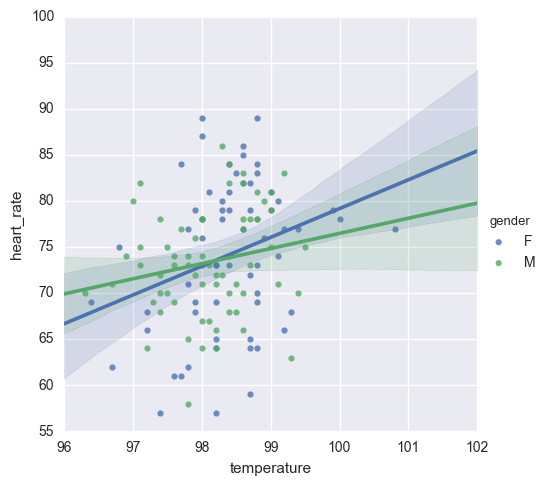

In [13]:
# Plot the linear regression to get a feel for it
sns.lmplot(x= 'temperature', y= 'heart_rate', hue='gender',data=df)

In [14]:
# Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
scipy.stats.pearsonr(df['temperature'],df['heart_rate'])

(0.25365640272076417, 0.003591489250708233)

The coefficient factor is 0.25 and the p-value is 0.004.  Given the small p-value, we conclude that there is a positive correlation between body temperature and heart rate.

In [15]:
# creates a linear regression model to test for correlation between temperature and heart_rate observations
import statsmodels.api as sm
Y = df['heart_rate']
X = df['temperature']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const         -166.284719
temperature      2.443238
dtype: float64

The slope of the model is 2.44 and the b intercept is -166.28.

heart_rate = 2.44 * temperature -166.28  

**The observations are not independent; there is a positive correlation between body temperature and heart rate.**

# 3. Is the true population mean really 98.6 degrees F?

## Would you use a one sample or two sample test? Why?

The one sample t-test tests for the null hypothesis that the mean of a sample of independent observations is equal to the given population mean.  The two sample t-test tests for the null hypothesis that two means from two separate samples are equal to one another.  We will use the one sample t-test to compare the mean of the samples to the "known" population mean.

## In this situation, is it appropriate to use the  t or z  statistic?

 If the standard deviation of the true population is not known, then it is best to use the t-statistic.  

**Calculate the t-statistic and corresponding pvalue.**

In [16]:
# use the one sample t-test
# This is a two-sided test for the null hypothesis that the expected mean of a sample of independent observations is
# equal to the given population mean.

scipy.stats.ttest_1samp(tdf,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The t-statistic is -5.45 and the p-value is approximately 0.

Assume the null hypothesis that the true population mean is 98.6 degrees F.  Then what is the propability that the mean of a sample of independent observations would be 98.25 degrees F.  The p-value of 0 indicates that probability to be less than 5%.  Therefore we reject the null hypothesis and conclude that the true population mean is the mean of our sample distribution which is 98.25 degrees F.

**Now calculate using the z-statistic and compare the results.**

In [17]:
# calculate z score
(tdf.mean() - 98.6)/(tdf.std()/130**0.5)

-5.454823292364079

**How do the results from each test differ? why?**

The t-statistic is -5.45 and the z-statistic is -5.45.  They are the same when the sample size is larger (>30). 

**We conclude that the true population mean of body temperature is 98.25 degrees F.**

# 4.  At what temperature should we consider someone's temperature to be "abnormal"?

## Calculate the margin of error and confidence interval.

In [18]:
# create a function called get_ci that calculates the confidence interval and margin of error for a given set of data

def get_ci(data, alpha):
    t_critical = scipy.stats.t.ppf(q = 1.0 - alpha, df = len(data) - 1)
    margin_of_error = t_critical * (data.std()/len(data)**0.5)
    confidence_interval = (data.mean() - margin_of_error, data.mean() + margin_of_error) 
    return margin_of_error, confidence_interval                   


In [19]:
# get the confidence interval for the temperature data that gives a 95% confidence level that the true mean falls within it
get_ci(tdf, 0.05)

(0.10653644509588847, (98.142694324134894, 98.355767214326661))

** We are 95% confident that the true mean temperature of the population falls within 98.14 and 98.36 degrees Fahrenheit.**

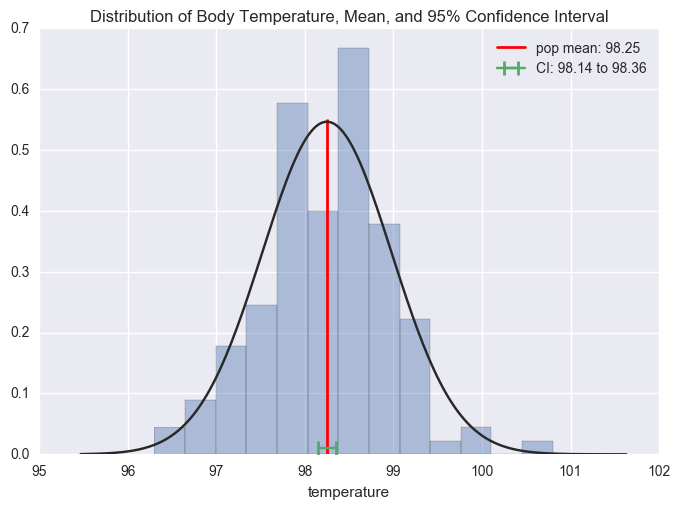

In [20]:
fig, ax = plt.subplots()
sns.distplot(tdf, fit=norm,kde=False)
plt.vlines(ymin=0.0, ymax= 0.55,x=tdf.mean(),linewidth=2.0, color="red", label='pop mean: 98.25' )
plt.errorbar(x=98.25, y=0.01, xerr=0.106,capthick=2, capsize=5, label='CI: 98.14 to 98.36' )
plt.legend()
plt.title('Distribution of Body Temperature, Mean, and 95% Confidence Interval')

** What is the range of temperature that we should consider to be "normal"?**

PerCent of Data under a Normal Distribution Curve Based on Number of Standard Deviations from the Mean

![alt text](Normal-distribution-curve.jpg "Normal Distribution Curve")

Let's assume that all of the samples taken were from healthy subjects.  Then we can assume that close to 100% of the samples are considered normal. If we look at the normal distribution curve, we see that 3 standard deviations in both directions from the mean gives us 99.7% of the possible data values.  So let's calculate the standard deviation and multiply by three in either direction of the mean to get our range of normal temperatures.

In [21]:
range = (tdf.mean() - 3 * tdf.std(), tdf.mean() + 3 * tdf.std())
range

(96.04968129511394, 100.44878024334761)

In [22]:
#compare this to the max and min values
tdf.min(), tdf.max()

(96.299999999999997, 100.8)


**We can say that 99.7% of "normal" temperatures will fall in the range of 96.05 to 100.45 degrees Fahrenheit.**

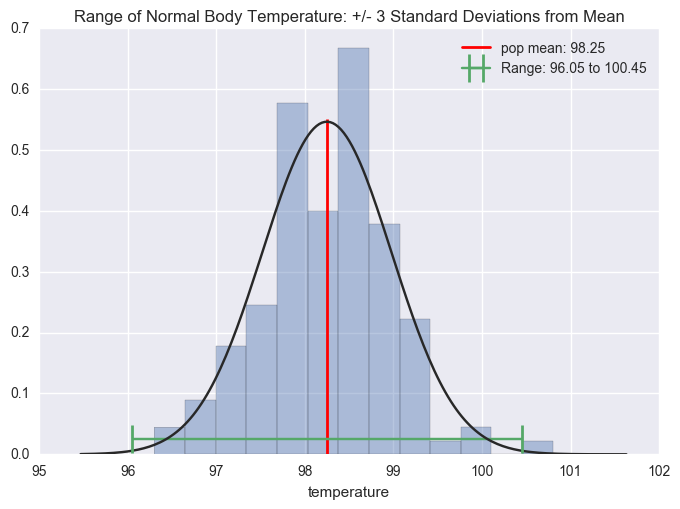

In [23]:
fig, ax = plt.subplots()
sns.distplot(tdf, fit=norm,kde=False)
#plt.vlines(ymin=0.0, ymax= 0.05,x=96.05,linewidth=2.0, color="pink", label='normal min: 96.05' )
plt.vlines(ymin=0.0, ymax= 0.55,x=tdf.mean(),linewidth=2.0, color="red", label='pop mean: 98.25' )
#plt.vlines(ymin=0.0, ymax= 0.05,x=100.45,linewidth=2.0, color="palevioletred", label='normal max: 100.45' )
plt.errorbar(x=98.25, y=0.025, xerr=3*tdf.std(),capthick=2, capsize=10, label='Range: 96.05 to 100.45' )
plt.legend()
plt.title('Range of Normal Body Temperature: +/- 3 Standard Deviations from Mean')

# Is there a significant difference between males and females in normal temperature?

In [24]:
# Let's separate the data into two groups: one with females, fdf, and one with males, mdf.
fdf = df[df.gender == 'F']['temperature']
mdf = df[df.gender == 'M']['temperature']

In [25]:
# what is the mean of the female group?
fdf.mean()

98.39384615384613

The mean temperature of the female population is 98.4 degrees F.

In [26]:
# what is the mean of the male group?
mdf.mean()

98.1046153846154

The mean temperature of the male population is 98.1 degrees F.

## Signicance Testing for the Difference in Means between Males and Females

In [27]:
# check to see if the variances are the same between the male and female groups
mdf.var() 

0.488259615384615

In [28]:
fdf.var()

0.5527740384615375

In [29]:
# conduct a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.
scipy.stats.ttest_ind(mdf,fdf, equal_var = False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

**Since the p-value is low, we reject the null hypothesis that the samples have identical means. And we conclude that the difference in means is not due to chance.**

Another way to analyze the significance of the difference in the means is to compute the confidence interval for the means of each group and then determine if they overlap.

In [30]:
# find the margin of error and confidence interval for the male population
get_ci(mdf, 0.05)

(0.14465333470037595, (97.959962049915021, 98.249268719315779))

In [31]:
# Find the margin of error and confidence interval for the female population
get_ci(fdf, 0.05)

(0.15391355397683856, (98.239932599869292, 98.547759707822962))

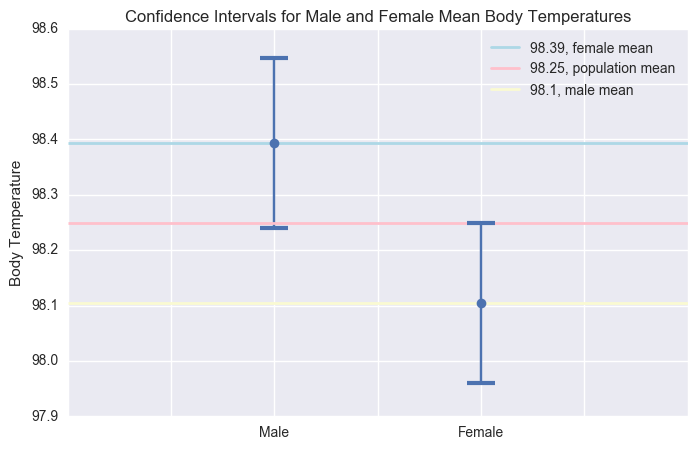

In [32]:
#plot the confidence intervals
plt.figure(figsize=(8,5))
#fig.subplots_adjust(bottom=0.5)
sample_means = [fdf.mean(),mdf.mean()]
intervals = [(98.239932599869292, 98.547759707822962),(97.959962049915021, 98.249268719315779)]
plt.errorbar(x=np.arange(1,3,1), y=sample_means, yerr=[(top-bot)/2 for top,bot in intervals], fmt='o',capthick=3, capsize=10)
plt.hlines(xmin=0, xmax=3, y=fdf.mean(), linewidth=2.0, color="lightblue", label='98.39, female mean')
plt.hlines(xmin=0, xmax=3, y=tdf.mean(), linewidth=2.0, color="pink", label='98.25, population mean')
plt.hlines(xmin=0, xmax=3, y=mdf.mean(), linewidth=2.0, color="lightgoldenrodyellow", label='98.1, male mean')

plt.title('Confidence Intervals for Male and Female Mean Body Temperatures')
plt.legend()
locs= [0.0,0.5,1.0,1.5,2.0,2.5,3.0]
labels= ['','','Male','','Female','','']
plt.xticks(locs, labels)    
plt.ylabel('Body Temperature')           

## Is the difference in male and female mean body temperatures statistsically significant?

Statistical significance occurs for values that are more than two standard deviations from the mean.  Let's see how far from the true population mean the female and male means are.

In [33]:
# how many std deviations is the female mean away from the mean?
abs(fdf.mean() - tdf.mean())/tdf.mean()

0.0014719238357705211

In [34]:
# how many std deviations is the male mean away from the mean?
abs(mdf.mean() - tdf.mean())/tdf.mean()

0.0014719238357708106

**The male and female means are 0.0015 standard deviations away from the mean.  Therefore, the difference is NOT statistically significant.**

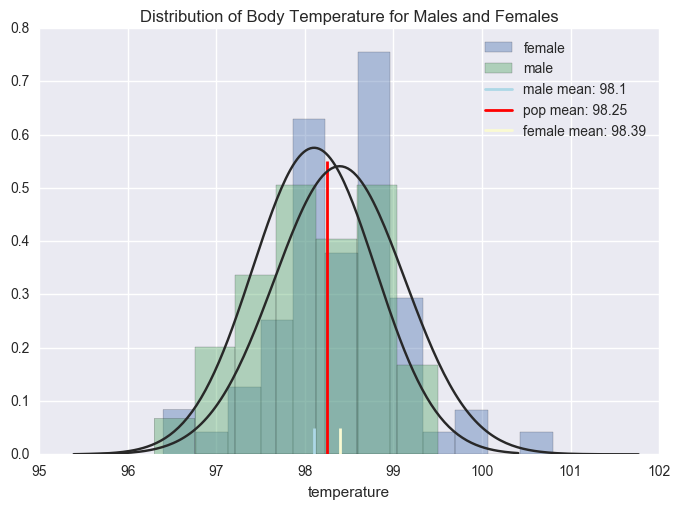

In [35]:
# plot the distribution of male and female body temperatures and save it for use in the Data Story
fig, ax = plt.subplots()
sns.distplot(fdf, fit=norm,kde=False, label='female')
sns.distplot(mdf, fit=norm,kde=False, label='male')
plt.vlines(ymin=0.0, ymax= 0.05,x=mdf.mean(),linewidth=2.0, color="lightblue", label='male mean: 98.1' )
plt.vlines(ymin=0.0, ymax= 0.55,x=tdf.mean(),linewidth=2.0, color="red", label='pop mean: 98.25' )
plt.vlines(ymin=0.0, ymax= 0.05,x=fdf.mean(),linewidth=2.0, color="lightgoldenrodyellow", label='female mean: 98.39' )
plt.legend()
plt.title('Distribution of Body Temperature for Males and Females')
plt.savefig('mybodytemp')

## Conclusion












<h2 align="center">An Examination of Human Body Temperature in Healthy Individuals</h2> 

## Problem/Questions
* What is the true mean for human body temperature?
* What is the range of temperature that should be considered "normal"?
* Is there a difference in mean body temperature in males and females? 

## Background
* For 120 years 98.6 degrees Fahreneheit has been considered the mean for human body temperature as reported by Carl Wunderlich.
* In 1992, the Journal of Statistics published an article which suggested a true mean of 98.25 based on temperatures gathered from 700 subjects over a 2 day period.
* The data set used in this study is a subset of the original data. It was created by Allen Shoemaker of Calvin College in 1996 and is comprised of 130 observations, half male and half female, of body temperature and heart rate.

## Data Analysis Summary

* A one sample t-test was used to compare the mean of the sample to the "known" population mean.
    * The mean of the sample is 98.25 degrees Fahrenheit.
    * The t-test proved that mean of the sample is the true mean of the population, **98.25 degrees Fahrenheit**.
    * With **95% confidence level** the true population mean is between 98.14 and 98.36 degrees Fahrenheit.
    
* The range of temperatures that comprises 99.7 per cent of the values was used to determine the range of normal temperatures.
    * Range of **normal temperature** is **96.05 to 100.45** degrees Fahrenheit.
    
* The mean of body temperature for males and females was calculated.
    * **Male mean** temperature is **98.1 degrees Fahrenheit**.
    * **Female mean** temperatue is **98.39 degrees Fahrenheit**.
    
* A two sample t-test proved that the **difference** in male and female mean body temperatures is **not due to chance**.
    * The probability of the two samples having identical means is 2.4%.
    
* The differences between male and female means to the population mean was found to be **not statistically significant**.
    * Statistical significance occurs when a value is 1 or more standard deviations from the mean. Their difference is 0.0015 standard deviations from the population mean.

![Alt Text](mybodytemp.png)

## Conclusions
* The true mean human body temperature is 98.25 +/- 0.11 degrees Fahrenheit.
* While there is a difference in male and female mean body temperatures, the differences when compared to the population mean are not statistically significant. 
* Assuming all the subjects in the study were healthy, we can conclude that the range of normal body temperature is 96.05 to 100.45 degrees Fahrenheit.

## Recommendations
* Knowing the difference in mean temperatures for certain vulnerable portions of the population such as infants, the elderly, or those with depressed immunity(i.e. someone taking chemotherapy) may be important in insuring prompt treatment.
* Educate medical personnel regarding the differences in means among different population groups.
* Have medical personnel include in their medical notes the details of how the temperature reading was obtained including time of day, type of thermometer used, etc.

![Alt Text](thermowarsfunnies2.jpg)